You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

### Summary Insights

**Most Consistent Tool:** ChatGPT demonstrated a trend of steady growth.  
**Largest Decline:** ChatGPT experienced its biggest drop in September 2024.  
**Best Overall Month:** Interest peaked in July.  

According to our findings, it seems that interest in AI tools increases sharply during certain months. 
**Note:** Visually, it seems that in January 2024, ChatGPT saw its lowest overall interest. However, the data suggests that the sharpest decline in interest was September 2024.   
Overall, ChatGPT maintains stable growth in the long term.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# Inspect the data
trends.head()

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


In [5]:
# Start coding here
# Use as many cells as you need
import numpy as np
from sklearn.linear_model import LinearRegression

#Identify which column is date/time
date_col = trends.columns[0] #assume first column is date
trends[date_col] = pd.to_datetime(trends[date_col])

#Identify AI tool columns 
tool_cols = [c for c in trends.columns if c != date_col]
tool_cols

['chatgpt', 'gemini', 'microsoft_copilot']

In [28]:
X = np.arange(len(trends)).reshape(-1, 1)
results = []

for col in tool_cols:
    y = trends[col].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - y.mean())**2)
    r2 = 1 - ss_res/ss_tot
    slope = model.coef_[0]
    results.append((col, slope, r2))

df_results = pd.DataFrame(results, columns=["Tool", "Slope", "R2"]).sort_values(["Slope","R2"], ascending=[False, False])
df_results


,Tool,Slope,R2
0,chatgpt,0.333981,0.276314
1,gemini,0.285496,0.751222
2,microsoft_copilot,0.069716,0.414944


In [24]:
positive = df_results[df_results["Slope"] > 0]
most_consistent_tool = positive.iloc[0]["Tool"] if not positive.empty else df_results.iloc[0]["Tool"]
most_consistent_tool

'chatgpt'

In [14]:
gpt_col = [c for c in tool_cols if "gpt" in c.lower()][0]
trends["gpt_change"] = trends[gpt_col].diff()
dip_month = trends.loc[trends["gpt_change"].idxmin(), date_col]
gpt_dip = dip_month.strftime("%B %Y")
gpt_dip

'September 2024'

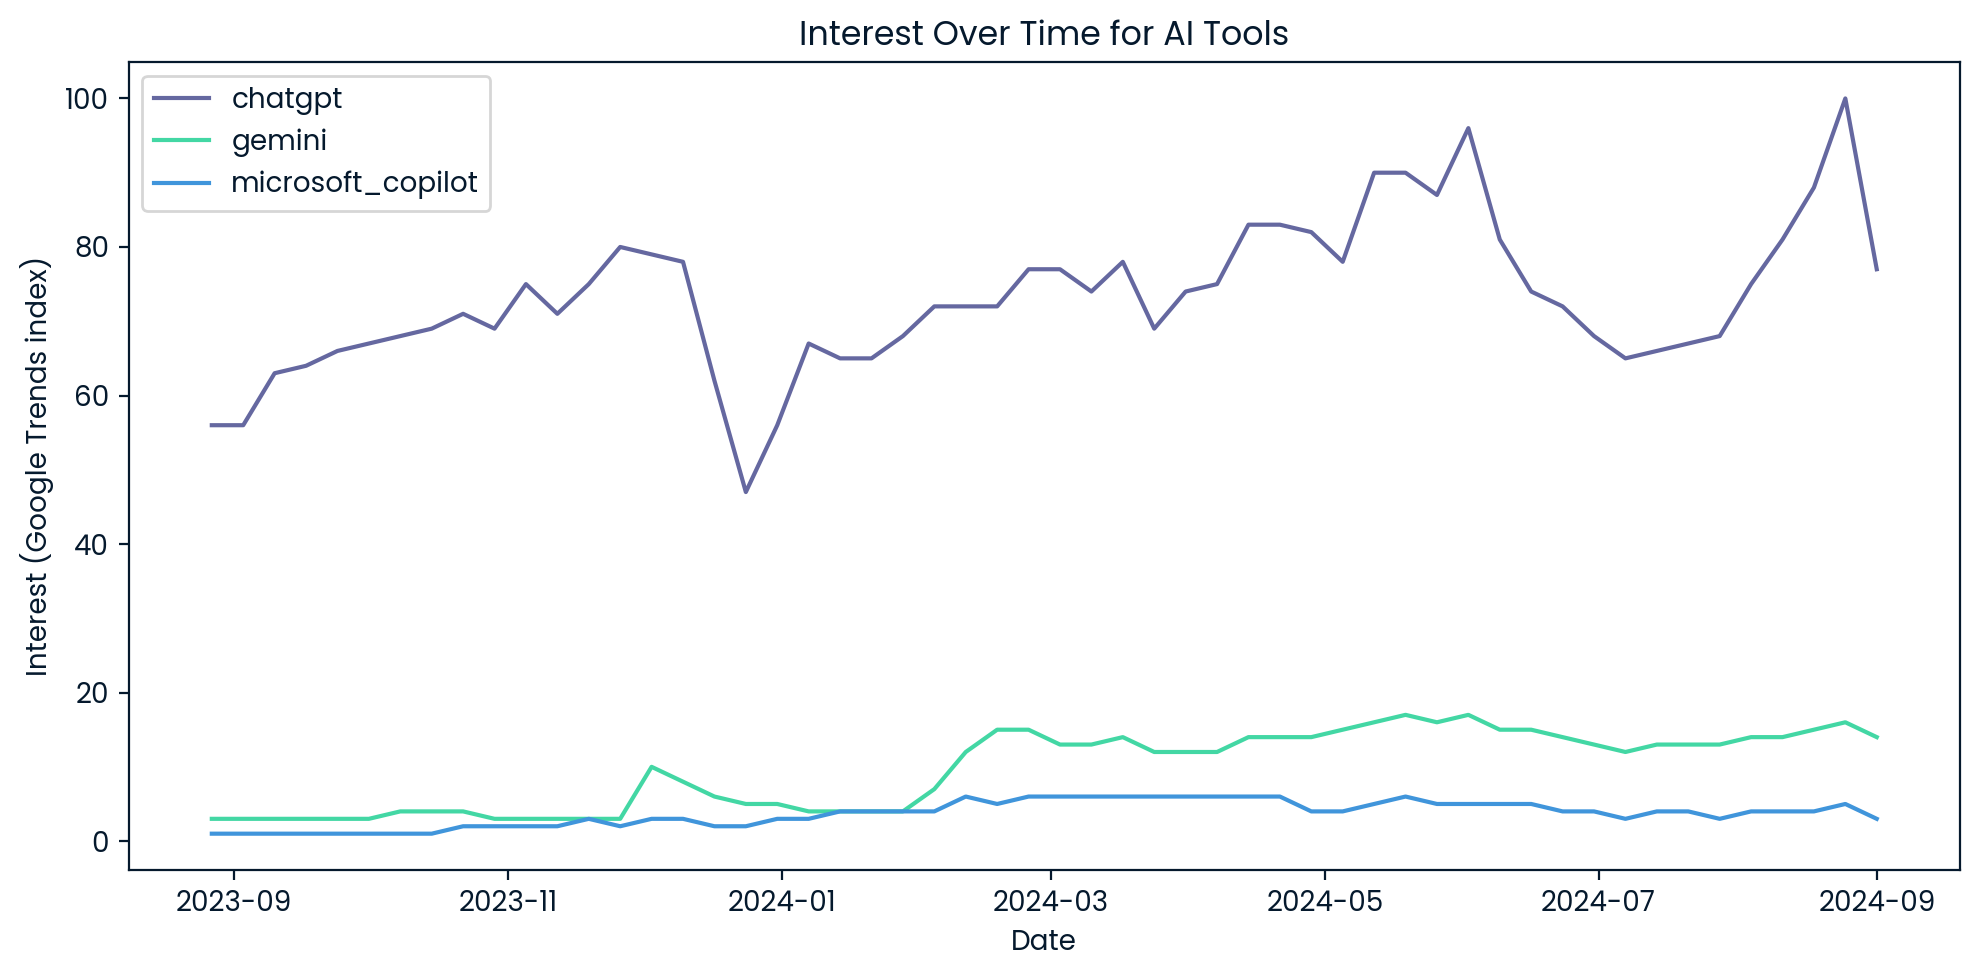

In [15]:
plt.figure(figsize=(10,5))
for col in tool_cols:
    plt.plot(trends[date_col], trends[col], label=col)
plt.title("Interest Over Time for AI Tools")
plt.xlabel("Date")
plt.ylabel("Interest (Google Trends index)")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
melted = trends.melt(id_vars=date_col, var_name="Tool", value_name="Interest")
melted["Month"] = melted[date_col].dt.month_name()
best_month = melted.groupby("Month")["Interest"].mean().idxmax()
best_month

'May'

In [30]:
print("most_consistent_tool", most_consistent_tool)
print("gpt_dip", gpt_dip)
print("best_month", best_month)

most_consistent_tool chatgpt
gpt_dip September 2024
best_month May
